In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Plain CNN model training: Without data augmentation

In [45]:
import pandas as pad
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [46]:
import warnings
warnings.filterwarnings('ignore')

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [48]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [49]:
class_names[y_train[0]]

'Ankle boot'

In [50]:
def show(index):
    plt.figure(figsize=(10, 3))
    plt.imshow(X_train[index])
    plt.title(class_names[y_train[index]])
    plt.axis(False)

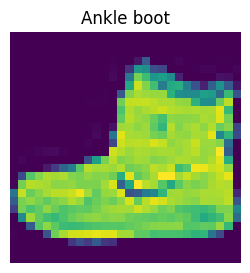

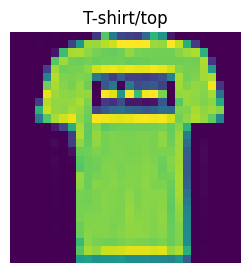

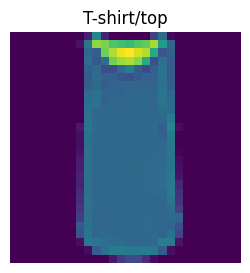

In [51]:
for i in range(3):
    show(i)

In [52]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

X_train_scaled.shape

(60000, 28, 28)

In [53]:
from tensorflow.keras import layers

num_classes = 10

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)   

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.7649 - loss: 0.6593
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8870 - loss: 0.3130
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9025 - loss: 0.2683
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9133 - loss: 0.2278
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9216 - loss: 0.2090


In [54]:
model.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9042 - loss: 0.2726


[0.26181724667549133, 0.9060999751091003]

In [55]:
y_pred = model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [56]:
y_pred[0]

array([-4.1576357, -8.356746 , -6.4299617, -3.679838 , -8.676197 ,
       -1.2739476, -6.0234175,  4.9930964, -4.951578 ,  8.684239 ],
      dtype=float32)

In [58]:
score = tf.nn.softmax(y_pred[0])

Shirt


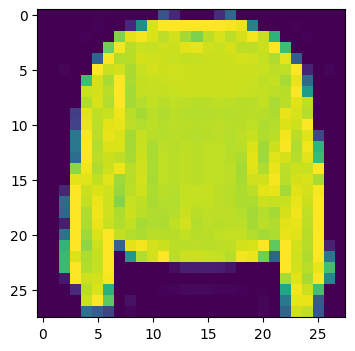

In [81]:
def test(index):
    score = tf.nn.softmax(y_pred[index])
    print(class_names[np.argmax(score)])
    plt.figure(figsize=(10, 4))
    plt.imshow(X_train_scaled[index])

test(7)

In [82]:
class_names[y_test[7]]

'Shirt'

## Improving test accuracy using data augmentation

In [67]:
import tensorflow as tf
from tensorflow import keras
from keras import layers 

data_aug = keras.Sequential([
    layers.RandomZoom(0.1) 
])

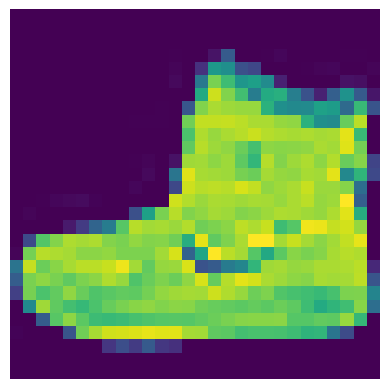

In [68]:
plt.axis('off')
plt.imshow(X_train_scaled[0])

In [ ]:
plt.axis('off')
plt.imshow(data_aug(X_train_scaled)[0].nujmpy().astype('uint8'))

#### Important to convert it to numpy array to make sure it can be printed by plt